# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#url
#url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

In [30]:
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))
#print(response.text)
#print(response.status_code)

{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [31]:
#set lists
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities
count_one = 0
set_one = 1

# loop for dataframe 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mandera
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | trinidad
Processing Record 9 of Set 1 | shihezi
Processing Record 10 of Set 1 | abu samrah
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | payson
Processing Record 14 of Set 1 | matara
Processing Record 15 of Set 1 | flinders
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | sainte-marie
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | tuktoyaktuk
Processing Record 24 of Set 1 | veraval
City not found. Skipping.

Processing Record 36 of Set 4 | severnoye
Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | lieto
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | bodden town
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | makaha
Processing Record 46 of Set 4 | oudtshoorn
Processing Record 47 of Set 4 | amurzet
Processing Record 48 of Set 4 | shimoda
Processing Record 49 of Set 4 | altamont
Processing Record 50 of Set 4 | baruun-urt
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | shwebo
Processing Record 4 of Set 5 | mae sai
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | trincomalee
Processing Record 7 of Set 5 | roma
Processing Record 8 of Set 5 | kabanjahe
Processing Record 9 of Set 5 | troitskoye
Processing Record 10 

Processing Record 26 of Set 8 | mayo
Processing Record 27 of Set 8 | sabha
Processing Record 28 of Set 8 | hualmay
Processing Record 29 of Set 8 | limbazi
Processing Record 30 of Set 8 | apache junction
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | tierranueva
Processing Record 33 of Set 8 | bairiki
City not found. Skipping...
Processing Record 34 of Set 8 | kambove
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | pionerskiy
Processing Record 37 of Set 8 | menongue
City not found. Skipping...
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | ocosingo
Processing Record 41 of Set 8 | urubicha
City not found. Skipping...
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | kristiansund
Processing Record 44 of Set 8 | lixourion
Processing Record 45 of Set 8 | damphu
Processing Record 46 of Set 8 | kozhevnikovo
Processing Record 47 of Set 8 | mount gambier
Processing Reco

Processing Record 9 of Set 12 | felsotarkany
Processing Record 10 of Set 12 | villa carlos paz
Processing Record 11 of Set 12 | yeppoon
Processing Record 12 of Set 12 | dukat
Processing Record 13 of Set 12 | port macquarie
Processing Record 14 of Set 12 | boyolangu
Processing Record 15 of Set 12 | riyadh
Processing Record 16 of Set 12 | sur
Processing Record 17 of Set 12 | tilichiki
Processing Record 18 of Set 12 | toledo
Processing Record 19 of Set 12 | saldanha
Processing Record 20 of Set 12 | egvekinot
Processing Record 21 of Set 12 | mitchell
Processing Record 22 of Set 12 | ouadda
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_dictionary = {
    "City": city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mandera,3.94,41.87,79.54,70,33,15.41,KE,1603242496
1,torbay,47.67,-52.73,57.99,93,90,12.75,CA,1603242315
2,hilo,19.73,-155.09,87.80,45,1,12.75,US,1603242473
3,bethel,41.37,-73.41,61.00,100,1,0.18,US,1603243039
4,jamestown,42.10,-79.24,48.00,93,90,8.05,US,1603243034


In [36]:
weather_df.to_csv(output_data_file)

In [37]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,22.570874,21.769108,60.207587,74.935315,50.171329,7.209108,1.603243e+09
std,31.175190,84.726914,19.441622,20.501190,41.248536,4.897634,2.021848e+02
min,-54.800000,-179.170000,1.400000,8.000000,0.000000,0.180000,1.603242e+09
25%,-2.952500,-46.065000,44.885000,65.000000,1.000000,3.552500,1.603243e+09
50%,26.620000,23.995000,64.635000,81.000000,40.500000,6.005000,1.603243e+09
75%,48.525000,88.370000,76.582500,91.000000,92.000000,9.985000,1.603243e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,27.560000,1.603243e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#print out any cities with humidity over 100, store in new DF. use loc funtion to look. we might not find anything with 
#humidity over 100, but if you do, exclude from data set
humidity_errors = weather_df.loc[weather_df["Humidity"] > 100]
humidity_errors
#print(weather_df[weather_df['Humidity']> 100])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [39]:
#  Get the indices of cities that have humidity over 100%.
#none exist 

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no cities exist with humidity over 100. skipping this step as the df is already clean

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

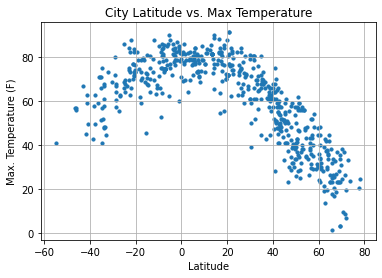

In [41]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_temperature_plot.png")

#show
plt.show()

## Latitude vs. Humidity Plot

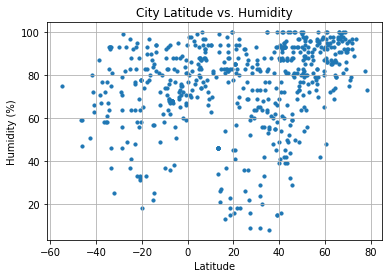

In [42]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_humidity_plot.png")

#show
plt.show()

## Latitude vs. Cloudiness Plot

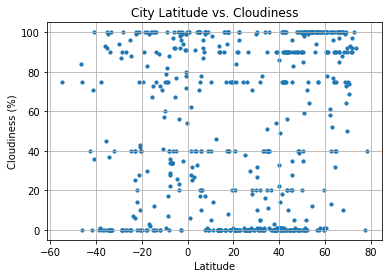

In [43]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_cloudiness_plot.png")

#show
plt.show()

## Latitude vs. Wind Speed Plot

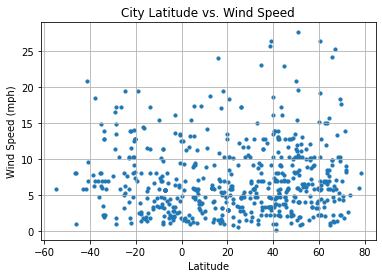

In [44]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

## Linear Regression

In [45]:
northern_hemisphere = weather_df[weather_df['Lat'] >= 0]
southern_hemisphere = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7790476439527253


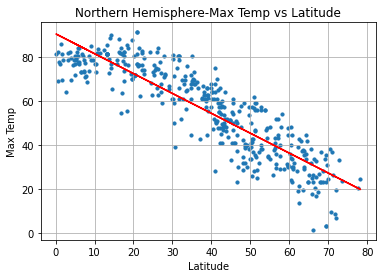

In [48]:
#scatter plot & linear regression
latitude = northern_hemisphere["Lat"]
max_temp = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress (latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "max_temp = " + str(round(slope,2)) + "latitude + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,max_temp)[0],2)

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], marker="o", s=10)
plt.plot(latitude,regress_values,"r-")
plt.title("Northern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


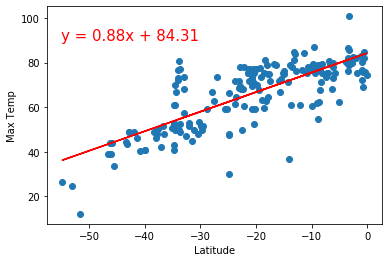

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


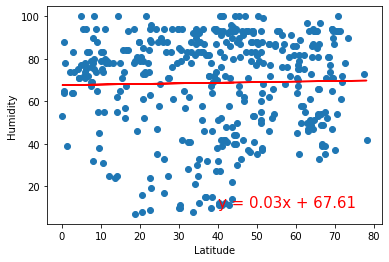

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


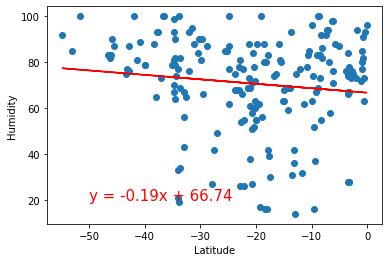

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


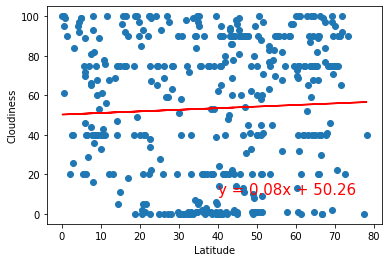

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


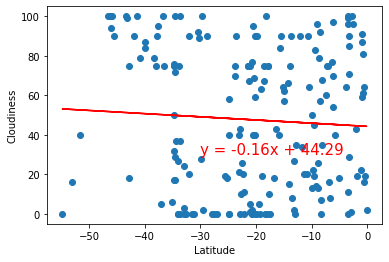

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


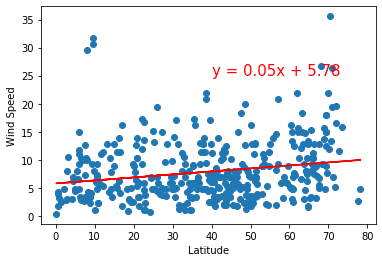

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


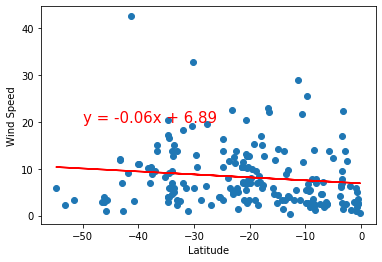